# Dobby High

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("amalgamated.parquet")

In [3]:
yfinance_metrics = [
    "ETH-BTC_High",
    "ETH-BTC_Low",
    "ETH-CAD_High",
    "ETH-CAD_Low",
    "BTC-CAD_High",
    "BTC-CAD_Low",
    'Global_Liquidity_Index'
]

coinmetrics_metrics = [
    "AdrBalNtv0.01Cnt",
    "AdrBalNtv0.1Cnt",
    "AdrBalNtv1Cnt",
    "AdrBalNtv10Cnt",
    "BlkSizeMeanByte",
    "CapRealUSD",
    "FeeByteMeanNtv",
    "FlowInExNtv",
    "FlowOutExNtv",
    "FlowTfrFromExCnt",
    "NDF",
    "SplyAct1d",
    "SplyActPct1yr",
    "TxCnt",
    "VelCur1yr"
]

# For BTC
btc_prefixed_metrics = ['btc_' + metric for metric in coinmetrics_metrics]

# For ETH
eth_prefixed_metrics = ['eth_' + metric for metric in coinmetrics_metrics]

# Combine both lists if you need a single list with all prefixed metrics
combined_prefixed_metrics = btc_prefixed_metrics + eth_prefixed_metrics

metrics = yfinance_metrics + combined_prefixed_metrics
df = df[metrics]

In [4]:
# Assuming df is your DataFrame
#df = df.pct_change()*100

# The first row will be NaN because there's no previous data to subtract from the first entry
# If you wish to remove the NaN values, you can drop the first row
df.dropna(inplace=True)

df

,ETH-BTC_High,ETH-BTC_Low,ETH-CAD_High,ETH-CAD_Low,BTC-CAD_High,BTC-CAD_Low,Global_Liquidity_Index,btc_AdrBalNtv0.01Cnt,btc_AdrBalNtv0.1Cnt,btc_AdrBalNtv1Cnt,...,eth_CapRealUSD,eth_FeeByteMeanNtv,eth_FlowInExNtv,eth_FlowOutExNtv,eth_FlowTfrFromExCnt,eth_NDF,eth_SplyAct1d,eth_SplyActPct1yr,eth_TxCnt,eth_VelCur1yr
2019-01-01,0.036718,0.035544,192.649857,180.575409,5246.870117,5057.234375,10677.402020,6457193.0,2539967.0,702986.0,...,28877687727.31675,0.000004,392978.197625,419726.133113,15602.0,0.635803,11221087.882036,72.295246,448168.0,11.758691
2019-01-02,0.039858,0.036676,213.886246,191.795868,5388.129883,5191.100586,11978.834450,6458964.0,2541704.0,703693.0,...,28990812437.411285,0.000003,790231.396805,729568.379931,21191.0,0.636376,10343209.345505,72.264375,589959.0,11.643999
2019-01-03,0.039754,0.038425,212.573837,198.451218,5362.917969,5159.898926,11919.945247,6459493.0,2542722.0,704873.0,...,28981719897.825188,0.000003,654169.139428,650444.543236,20336.0,0.636168,9498193.91421,72.221087,596620.0,11.529535
2019-01-04,0.040691,0.038730,211.151260,199.472687,5172.040527,5087.920898,11670.483300,6463332.0,2543644.0,705051.0,...,29094778907.792999,0.000003,680241.364599,1184203.323531,21142.0,0.636041,14212229.620577,72.193628,549398.0,11.365511
2019-01-05,0.041418,0.040067,215.118729,206.441116,5223.182617,5131.535645,10776.359592,6474689.0,2545280.0,705233.0,...,29046828453.278553,0.000005,631193.304059,1490287.90147,17419.0,0.637131,12886643.253894,72.080216,511189.0,11.22179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,0.057708,0.056463,4080.433105,3889.075195,70823.007812,68408.390625,149267.862256,12514606.0,4557892.0,1018084.0,...,177970045703.737518,0.000005,338244.178803,369824.650815,115266.0,0.680495,12715855.813516,35.492136,1082822.0,6.038789
2024-02-23,0.058400,0.056821,4086.931885,3920.955078,70136.312500,68749.429688,148970.534800,12502806.0,4557570.0,1018299.0,...,177548830056.101593,0.000004,252603.100873,277404.199378,123997.0,0.680803,11815753.076549,35.465276,1159988.0,6.035038
2024-02-24,0.058169,0.057328,4035.814941,3928.526855,69447.539062,68190.140625,145602.136981,12500030.0,4558351.0,1018191.0,...,178232114484.84201,0.000002,155983.333289,186391.16255,108806.0,0.680875,11198452.093627,35.44651,1101339.0,6.028215
2024-02-25,0.058235,0.057437,4050.259277,3921.470459,69703.890625,68222.062500,145897.798533,12490326.0,4557653.0,1018266.0,...,179512181502.223663,0.000002,227567.047768,215196.061444,105301.0,0.681513,10462790.19109,35.402746,1102202.0,6.025079


In [5]:
import pandas as pd
import numpy as np
import torch

from gluonts.dataset.common import ListDataset
from gluonts.torch.model.tft import TemporalFusionTransformerEstimator
from gluonts.transform.feature import MissingValueImputation

torch.set_float32_matmul_precision('high')
                                   
# Assuming df is your DataFrame with the data
target_column = 'ETH-BTC_High'  # Replace with your target column name

# Ensure the DataFrame's index is a datetime index and set the frequency explicitly if needed
df.index = pd.to_datetime(df.index)
freq = "D"  # Set the frequency of your data, e.g., 'D' for daily. Adjust as needed.
df = df.asfreq(freq)

# Define the prediction length
prediction_length = 5  # Set your prediction length

# Select dynamic features from the DataFrame, excluding the target column
past_dynamic_feature_columns = df.columns.drop(target_column)  # This excludes the target column

# Extract dynamic features as a numpy array
past_dynamic_features = df[past_dynamic_feature_columns].values.transpose()

# Assuming all dynamic features are known in the future, adjust the dimensions accordingly
past_dynamic_dims  = [1] * len(past_dynamic_feature_columns)  # Adjust based on actual dynamic features

# Make sure the lengths match when creating ListDataset
training_data = ListDataset([
    {
        "start": df.index[0],
        "target": df[target_column][:-prediction_length],
        "past_feat_dynamic_real": past_dynamic_features[:, :-prediction_length]
    }
], freq=freq)

# Adjust the slicing for dynamic features for the test dataset to ensure correct dimensions
test_past_dynamic_features_sliced = past_dynamic_features[:, -prediction_length:]

test_data = ListDataset([
    {
        "start": df.index[-prediction_length],
        "target": df[target_column][-prediction_length:].values,
        "past_feat_dynamic_real": test_past_dynamic_features_sliced
    }
], freq=freq)

# Initialize the Temporal Fusion Transformer Estimator
estimator = TemporalFusionTransformerEstimator(
    freq=freq,
    prediction_length=prediction_length,
    context_length=14,  # Optional: adjust based on your needs
    num_heads=32,
    hidden_dim=1024,
    variable_dim=1024,
    past_dynamic_dims= past_dynamic_dims,
    quantiles=[0.1, 0.5, 0.9],  # Specifying the quantiles for forecasting
    lr=0.001,
    weight_decay=1e-08,
    dropout_rate=0.1,
    patience=10,
    batch_size=128,
    num_batches_per_epoch=100,
    trainer_kwargs={'max_epochs': 500},  # Adjust 'gpus' based on your setup
)

# Train the model
predictor = estimator.train(training_data)

# Debugging: Print dimensions to verify alignment
print(f"Past Dynamic Features Training Shape: {past_dynamic_features[:, :-prediction_length].shape}")
print(f"Past Dynamic Features Test Shape: {test_past_dynamic_features_sliced.shape}")

# Collect actual and predicted values for evaluation, including percentiles
actuals = df[target_column][-prediction_length:].values
mean_predictions = []
p10_predictions = []
p50_predictions = []
p90_predictions = []

for forecast in predictor.predict(test_data):
    mean_predictions.append(forecast.mean)
    p10_predictions.append(forecast.quantile(0.1))
    p50_predictions.append(forecast.quantile(0.5))  # Median
    p90_predictions.append(forecast.quantile(0.9))

# Convert lists to numpy arrays for slicing
mean_predictions = np.array(mean_predictions).flatten()[:prediction_length]
p10_predictions = np.array(p10_predictions).flatten()[:prediction_length]
p50_predictions = np.array(p50_predictions).flatten()[:prediction_length]
p90_predictions = np.array(p90_predictions).flatten()[:prediction_length]


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\falty\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
C:\Users\fa

Epoch 0: |                                                | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=0.00689]

Epoch 0, global step 100: 'train_loss' reached 0.00689 (best 0.00689), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=0-step=100.ckpt' as top 1


Epoch 1: |                                                | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=0.00461]

Epoch 1, global step 200: 'train_loss' reached 0.00461 (best 0.00461), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=1-step=200.ckpt' as top 1


Epoch 2: |                                                | 100/? [00:17<00:00,  5.56it/s, v_num=2, train_loss=0.00478]

Epoch 2, global step 300: 'train_loss' was not in top 1


Epoch 3: |                                                | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=0.00467]

Epoch 3, global step 400: 'train_loss' was not in top 1


Epoch 4: |                                                | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=0.00462]

Epoch 4, global step 500: 'train_loss' was not in top 1


Epoch 5: |                                                | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.00463]

Epoch 5, global step 600: 'train_loss' was not in top 1


Epoch 6: |                                                | 100/? [00:17<00:00,  5.79it/s, v_num=2, train_loss=0.00457]

Epoch 6, global step 700: 'train_loss' reached 0.00457 (best 0.00457), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=6-step=700.ckpt' as top 1


Epoch 7: |                                                 | 100/? [00:17<00:00,  5.56it/s, v_num=2, train_loss=0.0046]

Epoch 7, global step 800: 'train_loss' was not in top 1


Epoch 8: |                                                | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=0.00467]

Epoch 8, global step 900: 'train_loss' was not in top 1


Epoch 9: |                                                | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.00464]

Epoch 9, global step 1000: 'train_loss' was not in top 1


Epoch 10: |                                               | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=0.00468]

Epoch 10, global step 1100: 'train_loss' was not in top 1


Epoch 11: |                                                | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=0.0046]

Epoch 11, global step 1200: 'train_loss' was not in top 1


Epoch 12: |                                               | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=0.00456]

Epoch 12, global step 1300: 'train_loss' reached 0.00456 (best 0.00456), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=12-step=1300.ckpt' as top 1


Epoch 13: |                                               | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=0.00459]

Epoch 13, global step 1400: 'train_loss' was not in top 1


Epoch 14: |                                               | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=0.00453]

Epoch 14, global step 1500: 'train_loss' reached 0.00453 (best 0.00453), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=14-step=1500.ckpt' as top 1


Epoch 15: |                                               | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.00454]

Epoch 15, global step 1600: 'train_loss' was not in top 1


Epoch 16: |                                               | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.00447]

Epoch 16, global step 1700: 'train_loss' reached 0.00447 (best 0.00447), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=16-step=1700.ckpt' as top 1


Epoch 17: |                                                | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.0044]

Epoch 17, global step 1800: 'train_loss' reached 0.00440 (best 0.00440), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=17-step=1800.ckpt' as top 1


Epoch 18: |                                               | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=0.00444]

Epoch 18, global step 1900: 'train_loss' was not in top 1


Epoch 19: |                                               | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=0.00446]

Epoch 19, global step 2000: 'train_loss' was not in top 1


Epoch 20: |                                               | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=0.00439]

Epoch 20, global step 2100: 'train_loss' reached 0.00439 (best 0.00439), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=20-step=2100.ckpt' as top 1


Epoch 21: |                                               | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.00441]

Epoch 21, global step 2200: 'train_loss' was not in top 1


Epoch 22: |                                               | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.00444]

Epoch 22, global step 2300: 'train_loss' was not in top 1


Epoch 23: |                                               | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.00438]

Epoch 23, global step 2400: 'train_loss' reached 0.00438 (best 0.00438), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=23-step=2400.ckpt' as top 1


Epoch 24: |                                               | 100/? [00:17<00:00,  5.64it/s, v_num=2, train_loss=0.00425]

Epoch 24, global step 2500: 'train_loss' reached 0.00425 (best 0.00425), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=24-step=2500.ckpt' as top 1


Epoch 25: |                                               | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=0.00425]

Epoch 25, global step 2600: 'train_loss' reached 0.00425 (best 0.00425), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=25-step=2600.ckpt' as top 1


Epoch 26: |                                               | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.00415]

Epoch 26, global step 2700: 'train_loss' reached 0.00415 (best 0.00415), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=26-step=2700.ckpt' as top 1


Epoch 27: |                                               | 100/? [00:17<00:00,  5.58it/s, v_num=2, train_loss=0.00406]

Epoch 27, global step 2800: 'train_loss' reached 0.00406 (best 0.00406), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=27-step=2800.ckpt' as top 1


Epoch 28: |                                               | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.00349]

Epoch 28, global step 2900: 'train_loss' reached 0.00349 (best 0.00349), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=28-step=2900.ckpt' as top 1


Epoch 29: |                                                | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.0025]

Epoch 29, global step 3000: 'train_loss' reached 0.00250 (best 0.00250), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=29-step=3000.ckpt' as top 1


Epoch 30: |                                               | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.00214]

Epoch 30, global step 3100: 'train_loss' reached 0.00214 (best 0.00214), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=30-step=3100.ckpt' as top 1


Epoch 31: |                                               | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.00176]

Epoch 31, global step 3200: 'train_loss' reached 0.00176 (best 0.00176), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=31-step=3200.ckpt' as top 1


Epoch 32: |                                               | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=0.00137]

Epoch 32, global step 3300: 'train_loss' reached 0.00137 (best 0.00137), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=32-step=3300.ckpt' as top 1


Epoch 33: |                                               | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.00115]

Epoch 33, global step 3400: 'train_loss' reached 0.00115 (best 0.00115), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=33-step=3400.ckpt' as top 1


Epoch 34: |                                               | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.00091]

Epoch 34, global step 3500: 'train_loss' reached 0.00091 (best 0.00091), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=34-step=3500.ckpt' as top 1


Epoch 35: |                                               | 100/? [00:18<00:00,  5.49it/s, v_num=2, train_loss=0.00078]

Epoch 35, global step 3600: 'train_loss' reached 0.00078 (best 0.00078), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=35-step=3600.ckpt' as top 1


Epoch 36: |                                              | 100/? [00:18<00:00,  5.49it/s, v_num=2, train_loss=0.000674]

Epoch 36, global step 3700: 'train_loss' reached 0.00067 (best 0.00067), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=36-step=3700.ckpt' as top 1


Epoch 37: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000656]

Epoch 37, global step 3800: 'train_loss' reached 0.00066 (best 0.00066), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=37-step=3800.ckpt' as top 1


Epoch 38: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.000533]

Epoch 38, global step 3900: 'train_loss' reached 0.00053 (best 0.00053), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=38-step=3900.ckpt' as top 1


Epoch 39: |                                              | 100/? [00:18<00:00,  5.53it/s, v_num=2, train_loss=0.000491]

Epoch 39, global step 4000: 'train_loss' reached 0.00049 (best 0.00049), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=39-step=4000.ckpt' as top 1


Epoch 40: |                                              | 100/? [00:18<00:00,  5.52it/s, v_num=2, train_loss=0.000416]

Epoch 40, global step 4100: 'train_loss' reached 0.00042 (best 0.00042), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=40-step=4100.ckpt' as top 1


Epoch 41: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000396]

Epoch 41, global step 4200: 'train_loss' reached 0.00040 (best 0.00040), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=41-step=4200.ckpt' as top 1


Epoch 42: |                                              | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=0.000366]

Epoch 42, global step 4300: 'train_loss' reached 0.00037 (best 0.00037), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=42-step=4300.ckpt' as top 1


Epoch 43: |                                              | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=0.000323]

Epoch 43, global step 4400: 'train_loss' reached 0.00032 (best 0.00032), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=43-step=4400.ckpt' as top 1


Epoch 44: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.000452]

Epoch 44, global step 4500: 'train_loss' was not in top 1


Epoch 45: |                                              | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=0.000357]

Epoch 45, global step 4600: 'train_loss' was not in top 1


Epoch 46: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000314]

Epoch 46, global step 4700: 'train_loss' reached 0.00031 (best 0.00031), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=46-step=4700.ckpt' as top 1


Epoch 47: |                                              | 100/? [00:18<00:00,  5.52it/s, v_num=2, train_loss=0.000292]

Epoch 47, global step 4800: 'train_loss' reached 0.00029 (best 0.00029), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=47-step=4800.ckpt' as top 1


Epoch 48: |                                              | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000269]

Epoch 48, global step 4900: 'train_loss' reached 0.00027 (best 0.00027), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=48-step=4900.ckpt' as top 1


Epoch 49: |                                               | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.00026]

Epoch 49, global step 5000: 'train_loss' reached 0.00026 (best 0.00026), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=49-step=5000.ckpt' as top 1


Epoch 50: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.000234]

Epoch 50, global step 5100: 'train_loss' reached 0.00023 (best 0.00023), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=50-step=5100.ckpt' as top 1


Epoch 51: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=0.000238]

Epoch 51, global step 5200: 'train_loss' was not in top 1


Epoch 52: |                                              | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=0.000237]

Epoch 52, global step 5300: 'train_loss' was not in top 1


Epoch 53: |                                              | 100/? [00:18<00:00,  5.53it/s, v_num=2, train_loss=0.000213]

Epoch 53, global step 5400: 'train_loss' reached 0.00021 (best 0.00021), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=53-step=5400.ckpt' as top 1


Epoch 54: |                                              | 100/? [00:18<00:00,  5.55it/s, v_num=2, train_loss=0.000209]

Epoch 54, global step 5500: 'train_loss' reached 0.00021 (best 0.00021), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=54-step=5500.ckpt' as top 1


Epoch 55: |                                              | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=0.000206]

Epoch 55, global step 5600: 'train_loss' reached 0.00021 (best 0.00021), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=55-step=5600.ckpt' as top 1


Epoch 56: |                                              | 100/? [00:18<00:00,  5.46it/s, v_num=2, train_loss=0.000205]

Epoch 56, global step 5700: 'train_loss' reached 0.00020 (best 0.00020), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=56-step=5700.ckpt' as top 1


Epoch 57: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.000189]

Epoch 57, global step 5800: 'train_loss' reached 0.00019 (best 0.00019), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=57-step=5800.ckpt' as top 1


Epoch 58: |                                              | 100/? [00:17<00:00,  5.58it/s, v_num=2, train_loss=0.000193]

Epoch 58, global step 5900: 'train_loss' was not in top 1


Epoch 59: |                                              | 100/? [00:18<00:00,  5.55it/s, v_num=2, train_loss=0.000185]

Epoch 59, global step 6000: 'train_loss' reached 0.00018 (best 0.00018), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=59-step=6000.ckpt' as top 1


Epoch 60: |                                              | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000181]

Epoch 60, global step 6100: 'train_loss' reached 0.00018 (best 0.00018), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=60-step=6100.ckpt' as top 1


Epoch 61: |                                              | 100/? [00:18<00:00,  5.46it/s, v_num=2, train_loss=0.000206]

Epoch 61, global step 6200: 'train_loss' was not in top 1


Epoch 62: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=0.000178]

Epoch 62, global step 6300: 'train_loss' reached 0.00018 (best 0.00018), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=62-step=6300.ckpt' as top 1


Epoch 63: |                                              | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=0.000172]

Epoch 63, global step 6400: 'train_loss' reached 0.00017 (best 0.00017), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=63-step=6400.ckpt' as top 1


Epoch 64: |                                               | 100/? [00:18<00:00,  5.55it/s, v_num=2, train_loss=0.00017]

Epoch 64, global step 6500: 'train_loss' reached 0.00017 (best 0.00017), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=64-step=6500.ckpt' as top 1


Epoch 65: |                                              | 100/? [00:18<00:00,  5.49it/s, v_num=2, train_loss=0.000177]

Epoch 65, global step 6600: 'train_loss' was not in top 1


Epoch 66: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000175]

Epoch 66, global step 6700: 'train_loss' was not in top 1


Epoch 67: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000163]

Epoch 67, global step 6800: 'train_loss' reached 0.00016 (best 0.00016), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=67-step=6800.ckpt' as top 1


Epoch 68: |                                              | 100/? [00:18<00:00,  5.55it/s, v_num=2, train_loss=0.000166]

Epoch 68, global step 6900: 'train_loss' was not in top 1


Epoch 69: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=0.000175]

Epoch 69, global step 7000: 'train_loss' was not in top 1


Epoch 70: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.000162]

Epoch 70, global step 7100: 'train_loss' reached 0.00016 (best 0.00016), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=70-step=7100.ckpt' as top 1


Epoch 71: |                                              | 100/? [00:18<00:00,  5.53it/s, v_num=2, train_loss=0.000166]

Epoch 71, global step 7200: 'train_loss' was not in top 1


Epoch 72: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000163]

Epoch 72, global step 7300: 'train_loss' was not in top 1


Epoch 73: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.000162]

Epoch 73, global step 7400: 'train_loss' was not in top 1


Epoch 74: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000167]

Epoch 74, global step 7500: 'train_loss' was not in top 1


Epoch 75: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.000159]

Epoch 75, global step 7600: 'train_loss' reached 0.00016 (best 0.00016), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=75-step=7600.ckpt' as top 1


Epoch 76: |                                              | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=0.000149]

Epoch 76, global step 7700: 'train_loss' reached 0.00015 (best 0.00015), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=76-step=7700.ckpt' as top 1


Epoch 77: |                                              | 100/? [00:18<00:00,  5.47it/s, v_num=2, train_loss=0.000155]

Epoch 77, global step 7800: 'train_loss' was not in top 1


Epoch 78: |                                              | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000149]

Epoch 78, global step 7900: 'train_loss' was not in top 1


Epoch 79: |                                              | 100/? [00:17<00:00,  5.64it/s, v_num=2, train_loss=0.000156]

Epoch 79, global step 8000: 'train_loss' was not in top 1


Epoch 80: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=0.000149]

Epoch 80, global step 8100: 'train_loss' was not in top 1


Epoch 81: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=0.000145]

Epoch 81, global step 8200: 'train_loss' reached 0.00015 (best 0.00015), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=81-step=8200.ckpt' as top 1


Epoch 82: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=0.000143]

Epoch 82, global step 8300: 'train_loss' reached 0.00014 (best 0.00014), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=82-step=8300.ckpt' as top 1


Epoch 83: |                                              | 100/? [00:18<00:00,  5.48it/s, v_num=2, train_loss=0.000145]

Epoch 83, global step 8400: 'train_loss' was not in top 1


Epoch 84: |                                              | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=0.000147]

Epoch 84, global step 8500: 'train_loss' was not in top 1


Epoch 85: |                                              | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=0.000148]

Epoch 85, global step 8600: 'train_loss' was not in top 1


Epoch 86: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=0.000143]

Epoch 86, global step 8700: 'train_loss' was not in top 1


Epoch 87: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.000139]

Epoch 87, global step 8800: 'train_loss' reached 0.00014 (best 0.00014), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=87-step=8800.ckpt' as top 1


Epoch 88: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.000142]

Epoch 88, global step 8900: 'train_loss' was not in top 1


Epoch 89: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=0.000145]

Epoch 89, global step 9000: 'train_loss' was not in top 1


Epoch 90: |                                              | 100/? [00:18<00:00,  5.52it/s, v_num=2, train_loss=0.000149]

Epoch 90, global step 9100: 'train_loss' was not in top 1


Epoch 91: |                                              | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=0.000141]

Epoch 91, global step 9200: 'train_loss' was not in top 1


Epoch 92: |                                              | 100/? [00:18<00:00,  5.51it/s, v_num=2, train_loss=0.000144]

Epoch 92, global step 9300: 'train_loss' was not in top 1


Epoch 93: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.000135]

Epoch 93, global step 9400: 'train_loss' reached 0.00014 (best 0.00014), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=93-step=9400.ckpt' as top 1


Epoch 94: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.000144]

Epoch 94, global step 9500: 'train_loss' was not in top 1


Epoch 95: |                                              | 100/? [00:18<00:00,  5.45it/s, v_num=2, train_loss=0.000142]

Epoch 95, global step 9600: 'train_loss' was not in top 1


Epoch 96: |                                              | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=0.000129]

Epoch 96, global step 9700: 'train_loss' reached 0.00013 (best 0.00013), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=96-step=9700.ckpt' as top 1


Epoch 97: |                                              | 100/? [00:18<00:00,  5.51it/s, v_num=2, train_loss=0.000134]

Epoch 97, global step 9800: 'train_loss' was not in top 1


Epoch 98: |                                              | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000124]

Epoch 98, global step 9900: 'train_loss' reached 0.00012 (best 0.00012), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=98-step=9900.ckpt' as top 1


Epoch 99: |                                              | 100/? [00:18<00:00,  5.48it/s, v_num=2, train_loss=0.000126]

Epoch 99, global step 10000: 'train_loss' was not in top 1


Epoch 100: |                                             | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=0.000132]

Epoch 100, global step 10100: 'train_loss' was not in top 1


Epoch 101: |                                             | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=0.000133]

Epoch 101, global step 10200: 'train_loss' was not in top 1


Epoch 102: |                                             | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=0.000122]

Epoch 102, global step 10300: 'train_loss' reached 0.00012 (best 0.00012), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=102-step=10300.ckpt' as top 1


Epoch 103: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000122]

Epoch 103, global step 10400: 'train_loss' reached 0.00012 (best 0.00012), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=103-step=10400.ckpt' as top 1


Epoch 104: |                                             | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=0.000128]

Epoch 104, global step 10500: 'train_loss' was not in top 1


Epoch 105: |                                             | 100/? [00:17<00:00,  5.58it/s, v_num=2, train_loss=0.000126]

Epoch 105, global step 10600: 'train_loss' was not in top 1


Epoch 106: |                                             | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=0.000125]

Epoch 106, global step 10700: 'train_loss' was not in top 1


Epoch 107: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.00012]

Epoch 107, global step 10800: 'train_loss' reached 0.00012 (best 0.00012), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=107-step=10800.ckpt' as top 1


Epoch 108: |                                             | 100/? [00:18<00:00,  5.53it/s, v_num=2, train_loss=0.000126]

Epoch 108, global step 10900: 'train_loss' was not in top 1


Epoch 109: |                                             | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=0.000127]

Epoch 109, global step 11000: 'train_loss' was not in top 1


Epoch 110: |                                             | 100/? [00:17<00:00,  5.64it/s, v_num=2, train_loss=0.000117]

Epoch 110, global step 11100: 'train_loss' reached 0.00012 (best 0.00012), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=110-step=11100.ckpt' as top 1


Epoch 111: |                                             | 100/? [00:18<00:00,  5.36it/s, v_num=2, train_loss=0.000129]

Epoch 111, global step 11200: 'train_loss' was not in top 1


Epoch 112: |                                             | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.000128]

Epoch 112, global step 11300: 'train_loss' was not in top 1


Epoch 113: |                                             | 100/? [00:17<00:00,  5.58it/s, v_num=2, train_loss=0.000114]

Epoch 113, global step 11400: 'train_loss' reached 0.00011 (best 0.00011), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=113-step=11400.ckpt' as top 1


Epoch 114: |                                             | 100/? [00:18<00:00,  5.46it/s, v_num=2, train_loss=0.000128]

Epoch 114, global step 11500: 'train_loss' was not in top 1


Epoch 115: |                                             | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000192]

Epoch 115, global step 11600: 'train_loss' was not in top 1


Epoch 116: |                                             | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.000155]

Epoch 116, global step 11700: 'train_loss' was not in top 1


Epoch 117: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000132]

Epoch 117, global step 11800: 'train_loss' was not in top 1


Epoch 118: |                                             | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000121]

Epoch 118, global step 11900: 'train_loss' was not in top 1


Epoch 119: |                                             | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.000122]

Epoch 119, global step 12000: 'train_loss' was not in top 1


Epoch 120: |                                             | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=0.000118]

Epoch 120, global step 12100: 'train_loss' was not in top 1


Epoch 121: |                                              | 100/? [00:17<00:00,  5.56it/s, v_num=2, train_loss=0.00012]

Epoch 121, global step 12200: 'train_loss' was not in top 1


Epoch 122: |                                             | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.000113]

Epoch 122, global step 12300: 'train_loss' reached 0.00011 (best 0.00011), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=122-step=12300.ckpt' as top 1


Epoch 123: |                                             | 100/? [00:18<00:00,  5.48it/s, v_num=2, train_loss=0.000108]

Epoch 123, global step 12400: 'train_loss' reached 0.00011 (best 0.00011), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=123-step=12400.ckpt' as top 1


Epoch 124: |                                             | 100/? [00:18<00:00,  5.41it/s, v_num=2, train_loss=0.000111]

Epoch 124, global step 12500: 'train_loss' was not in top 1


Epoch 125: |                                             | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.000114]

Epoch 125, global step 12600: 'train_loss' was not in top 1


Epoch 126: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000113]

Epoch 126, global step 12700: 'train_loss' was not in top 1


Epoch 127: |                                             | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=0.000118]

Epoch 127, global step 12800: 'train_loss' was not in top 1


Epoch 128: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000113]

Epoch 128, global step 12900: 'train_loss' was not in top 1


Epoch 129: |                                             | 100/? [00:17<00:00,  5.64it/s, v_num=2, train_loss=0.000107]

Epoch 129, global step 13000: 'train_loss' reached 0.00011 (best 0.00011), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=129-step=13000.ckpt' as top 1


Epoch 130: |                                               | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.0001]

Epoch 130, global step 13100: 'train_loss' reached 0.00010 (best 0.00010), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=130-step=13100.ckpt' as top 1


Epoch 131: |                                             | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.000104]

Epoch 131, global step 13200: 'train_loss' was not in top 1


Epoch 132: |                                             | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=0.000103]

Epoch 132, global step 13300: 'train_loss' was not in top 1


Epoch 133: |                                             | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=0.000116]

Epoch 133, global step 13400: 'train_loss' was not in top 1


Epoch 134: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000104]

Epoch 134, global step 13500: 'train_loss' was not in top 1


Epoch 135: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000106]

Epoch 135, global step 13600: 'train_loss' was not in top 1


Epoch 136: |                                             | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=0.000107]

Epoch 136, global step 13700: 'train_loss' was not in top 1


Epoch 137: |                                             | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=0.000106]

Epoch 137, global step 13800: 'train_loss' was not in top 1


Epoch 138: |                                               | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=0.0001]

Epoch 138, global step 13900: 'train_loss' reached 0.00010 (best 0.00010), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=138-step=13900.ckpt' as top 1


Epoch 139: |                                             | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=0.000104]

Epoch 139, global step 14000: 'train_loss' was not in top 1


Epoch 140: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=9.74e-5]

Epoch 140, global step 14100: 'train_loss' reached 0.00010 (best 0.00010), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=140-step=14100.ckpt' as top 1


Epoch 141: |                                             | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=0.000106]

Epoch 141, global step 14200: 'train_loss' was not in top 1


Epoch 142: |                                             | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=0.000107]

Epoch 142, global step 14300: 'train_loss' was not in top 1


Epoch 143: |                                             | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=0.000104]

Epoch 143, global step 14400: 'train_loss' was not in top 1


Epoch 144: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=9.77e-5]

Epoch 144, global step 14500: 'train_loss' was not in top 1


Epoch 145: |                                             | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=0.000104]

Epoch 145, global step 14600: 'train_loss' was not in top 1


Epoch 146: |                                             | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.000102]

Epoch 146, global step 14700: 'train_loss' was not in top 1


Epoch 147: |                                             | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=0.000105]

Epoch 147, global step 14800: 'train_loss' was not in top 1


Epoch 148: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=0.00011]

Epoch 148, global step 14900: 'train_loss' was not in top 1


Epoch 149: |                                             | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=0.000108]

Epoch 149, global step 15000: 'train_loss' was not in top 1


Epoch 150: |                                             | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=0.000113]

Epoch 150, global step 15100: 'train_loss' was not in top 1


Epoch 151: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=9.81e-5]

Epoch 151, global step 15200: 'train_loss' was not in top 1


Epoch 152: |                                              | 100/? [00:17<00:00,  5.56it/s, v_num=2, train_loss=6.03e-5]

Epoch 152, global step 15300: 'train_loss' reached 0.00006 (best 0.00006), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=152-step=15300.ckpt' as top 1


Epoch 153: |                                              | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=4.92e-5]

Epoch 153, global step 15400: 'train_loss' reached 0.00005 (best 0.00005), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=153-step=15400.ckpt' as top 1


Epoch 154: |                                              | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=5.27e-5]

Epoch 154, global step 15500: 'train_loss' was not in top 1


Epoch 155: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=4.84e-5]

Epoch 155, global step 15600: 'train_loss' reached 0.00005 (best 0.00005), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=155-step=15600.ckpt' as top 1


Epoch 156: |                                              | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=5.36e-5]

Epoch 156, global step 15700: 'train_loss' was not in top 1


Epoch 157: |                                               | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=5.1e-5]

Epoch 157, global step 15800: 'train_loss' was not in top 1


Epoch 158: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=5.25e-5]

Epoch 158, global step 15900: 'train_loss' was not in top 1


Epoch 159: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=5.02e-5]

Epoch 159, global step 16000: 'train_loss' was not in top 1


Epoch 160: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=5.21e-5]

Epoch 160, global step 16100: 'train_loss' was not in top 1


Epoch 161: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=4.99e-5]

Epoch 161, global step 16200: 'train_loss' was not in top 1


Epoch 162: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=5.02e-5]

Epoch 162, global step 16300: 'train_loss' was not in top 1


Epoch 163: |                                              | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=5.31e-5]

Epoch 163, global step 16400: 'train_loss' was not in top 1


Epoch 164: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=5.32e-5]

Epoch 164, global step 16500: 'train_loss' was not in top 1


Epoch 165: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=5.37e-5]

Epoch 165, global step 16600: 'train_loss' was not in top 1


Epoch 166: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=5.19e-5]

Epoch 166, global step 16700: 'train_loss' was not in top 1


Epoch 167: |                                              | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=3.35e-5]

Epoch 167, global step 16800: 'train_loss' reached 0.00003 (best 0.00003), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=167-step=16800.ckpt' as top 1


Epoch 168: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=2.86e-5]

Epoch 168, global step 16900: 'train_loss' reached 0.00003 (best 0.00003), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=168-step=16900.ckpt' as top 1


Epoch 169: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=3.04e-5]

Epoch 169, global step 17000: 'train_loss' was not in top 1


Epoch 170: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=2.96e-5]

Epoch 170, global step 17100: 'train_loss' was not in top 1


Epoch 171: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=3.06e-5]

Epoch 171, global step 17200: 'train_loss' was not in top 1


Epoch 172: |                                              | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=3.26e-5]

Epoch 172, global step 17300: 'train_loss' was not in top 1


Epoch 173: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=2.92e-5]

Epoch 173, global step 17400: 'train_loss' was not in top 1


Epoch 174: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=3.14e-5]

Epoch 174, global step 17500: 'train_loss' was not in top 1


Epoch 175: |                                              | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=3.12e-5]

Epoch 175, global step 17600: 'train_loss' was not in top 1


Epoch 176: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=2.96e-5]

Epoch 176, global step 17700: 'train_loss' was not in top 1


Epoch 177: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=2.99e-5]

Epoch 177, global step 17800: 'train_loss' was not in top 1


Epoch 178: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=3.02e-5]

Epoch 178, global step 17900: 'train_loss' was not in top 1


Epoch 179: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=3.15e-5]

Epoch 179, global step 18000: 'train_loss' was not in top 1


Epoch 180: |                                              | 100/? [00:17<00:00,  5.58it/s, v_num=2, train_loss=2.22e-5]

Epoch 180, global step 18100: 'train_loss' reached 0.00002 (best 0.00002), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=180-step=18100.ckpt' as top 1


Epoch 181: |                                              | 100/? [00:18<00:00,  5.55it/s, v_num=2, train_loss=1.95e-5]

Epoch 181, global step 18200: 'train_loss' reached 0.00002 (best 0.00002), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=181-step=18200.ckpt' as top 1


Epoch 182: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=1.99e-5]

Epoch 182, global step 18300: 'train_loss' was not in top 1


Epoch 183: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=2.03e-5]

Epoch 183, global step 18400: 'train_loss' was not in top 1


Epoch 184: |                                              | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=2.03e-5]

Epoch 184, global step 18500: 'train_loss' was not in top 1


Epoch 185: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=2.05e-5]

Epoch 185, global step 18600: 'train_loss' was not in top 1


Epoch 186: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=2.15e-5]

Epoch 186, global step 18700: 'train_loss' was not in top 1


Epoch 187: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=2.05e-5]

Epoch 187, global step 18800: 'train_loss' was not in top 1


Epoch 188: |                                               | 100/? [00:17<00:00,  5.80it/s, v_num=2, train_loss=2.1e-5]

Epoch 188, global step 18900: 'train_loss' was not in top 1


Epoch 189: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=2.07e-5]

Epoch 189, global step 19000: 'train_loss' was not in top 1


Epoch 190: |                                               | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=2.1e-5]

Epoch 190, global step 19100: 'train_loss' was not in top 1


Epoch 191: |                                                 | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=2e-5]

Epoch 191, global step 19200: 'train_loss' was not in top 1


Epoch 192: |                                              | 100/? [00:17<00:00,  5.56it/s, v_num=2, train_loss=2.05e-5]

Epoch 192, global step 19300: 'train_loss' was not in top 1


Epoch 193: |                                              | 100/? [00:18<00:00,  5.55it/s, v_num=2, train_loss=1.62e-5]

Epoch 193, global step 19400: 'train_loss' reached 0.00002 (best 0.00002), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=193-step=19400.ckpt' as top 1


Epoch 194: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=1.55e-5]

Epoch 194, global step 19500: 'train_loss' reached 0.00002 (best 0.00002), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=194-step=19500.ckpt' as top 1


Epoch 195: |                                              | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=1.58e-5]

Epoch 195, global step 19600: 'train_loss' was not in top 1


Epoch 196: |                                              | 100/? [00:17<00:00,  5.64it/s, v_num=2, train_loss=1.53e-5]

Epoch 196, global step 19700: 'train_loss' reached 0.00002 (best 0.00002), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=196-step=19700.ckpt' as top 1


Epoch 197: |                                              | 100/? [00:18<00:00,  5.52it/s, v_num=2, train_loss=1.55e-5]

Epoch 197, global step 19800: 'train_loss' was not in top 1


Epoch 198: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=1.56e-5]

Epoch 198, global step 19900: 'train_loss' was not in top 1


Epoch 199: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.58e-5]

Epoch 199, global step 20000: 'train_loss' was not in top 1


Epoch 200: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=1.56e-5]

Epoch 200, global step 20100: 'train_loss' was not in top 1


Epoch 201: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=1.55e-5]

Epoch 201, global step 20200: 'train_loss' was not in top 1


Epoch 202: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=1.55e-5]

Epoch 202, global step 20300: 'train_loss' was not in top 1


Epoch 203: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=1.58e-5]

Epoch 203, global step 20400: 'train_loss' was not in top 1


Epoch 204: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=1.55e-5]

Epoch 204, global step 20500: 'train_loss' was not in top 1


Epoch 205: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=1.55e-5]

Epoch 205, global step 20600: 'train_loss' was not in top 1


Epoch 206: |                                              | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=1.56e-5]

Epoch 206, global step 20700: 'train_loss' was not in top 1


Epoch 207: |                                              | 100/? [00:17<00:00,  5.78it/s, v_num=2, train_loss=1.53e-5]

Epoch 207, global step 20800: 'train_loss' was not in top 1


Epoch 208: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=1.38e-5]

Epoch 208, global step 20900: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=208-step=20900.ckpt' as top 1


Epoch 209: |                                              | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=1.33e-5]

Epoch 209, global step 21000: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=209-step=21000.ckpt' as top 1


Epoch 210: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=1.35e-5]

Epoch 210, global step 21100: 'train_loss' was not in top 1


Epoch 211: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=1.33e-5]

Epoch 211, global step 21200: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=211-step=21200.ckpt' as top 1


Epoch 212: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=1.34e-5]

Epoch 212, global step 21300: 'train_loss' was not in top 1


Epoch 213: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.36e-5]

Epoch 213, global step 21400: 'train_loss' was not in top 1


Epoch 214: |                                              | 100/? [00:17<00:00,  5.79it/s, v_num=2, train_loss=1.36e-5]

Epoch 214, global step 21500: 'train_loss' was not in top 1


Epoch 215: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=1.35e-5]

Epoch 215, global step 21600: 'train_loss' was not in top 1


Epoch 216: |                                              | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=1.33e-5]

Epoch 216, global step 21700: 'train_loss' was not in top 1


Epoch 217: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=1.35e-5]

Epoch 217, global step 21800: 'train_loss' was not in top 1


Epoch 218: |                                              | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=1.35e-5]

Epoch 218, global step 21900: 'train_loss' was not in top 1


Epoch 219: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.34e-5]

Epoch 219, global step 22000: 'train_loss' was not in top 1


Epoch 220: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.32e-5]

Epoch 220, global step 22100: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=220-step=22100.ckpt' as top 1


Epoch 221: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=1.34e-5]

Epoch 221, global step 22200: 'train_loss' was not in top 1


Epoch 222: |                                              | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=1.33e-5]

Epoch 222, global step 22300: 'train_loss' was not in top 1


Epoch 223: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=1.33e-5]

Epoch 223, global step 22400: 'train_loss' was not in top 1


Epoch 224: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.32e-5]

Epoch 224, global step 22500: 'train_loss' was not in top 1


Epoch 225: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=1.33e-5]

Epoch 225, global step 22600: 'train_loss' was not in top 1


Epoch 226: |                                              | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=1.32e-5]

Epoch 226, global step 22700: 'train_loss' was not in top 1


Epoch 227: |                                              | 100/? [00:17<00:00,  5.74it/s, v_num=2, train_loss=1.33e-5]

Epoch 227, global step 22800: 'train_loss' was not in top 1


Epoch 228: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.32e-5]

Epoch 228, global step 22900: 'train_loss' was not in top 1


Epoch 229: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.33e-5]

Epoch 229, global step 23000: 'train_loss' was not in top 1


Epoch 230: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.33e-5]

Epoch 230, global step 23100: 'train_loss' was not in top 1


Epoch 231: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.33e-5]

Epoch 231, global step 23200: 'train_loss' was not in top 1


Epoch 232: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.25e-5]

Epoch 232, global step 23300: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=232-step=23300.ckpt' as top 1


Epoch 233: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=1.22e-5]

Epoch 233, global step 23400: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=233-step=23400.ckpt' as top 1


Epoch 234: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.22e-5]

Epoch 234, global step 23500: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=234-step=23500.ckpt' as top 1


Epoch 235: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.23e-5]

Epoch 235, global step 23600: 'train_loss' was not in top 1


Epoch 236: |                                              | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=1.21e-5]

Epoch 236, global step 23700: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=236-step=23700.ckpt' as top 1


Epoch 237: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=1.21e-5]

Epoch 237, global step 23800: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=237-step=23800.ckpt' as top 1


Epoch 238: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=1.23e-5]

Epoch 238, global step 23900: 'train_loss' was not in top 1


Epoch 239: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.22e-5]

Epoch 239, global step 24000: 'train_loss' was not in top 1


Epoch 240: |                                              | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=1.23e-5]

Epoch 240, global step 24100: 'train_loss' was not in top 1


Epoch 241: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.22e-5]

Epoch 241, global step 24200: 'train_loss' was not in top 1


Epoch 242: |                                              | 100/? [00:17<00:00,  5.73it/s, v_num=2, train_loss=1.21e-5]

Epoch 242, global step 24300: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=242-step=24300.ckpt' as top 1


Epoch 243: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=1.21e-5]

Epoch 243, global step 24400: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=243-step=24400.ckpt' as top 1


Epoch 244: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=1.24e-5]

Epoch 244, global step 24500: 'train_loss' was not in top 1


Epoch 245: |                                              | 100/? [00:17<00:00,  5.68it/s, v_num=2, train_loss=1.23e-5]

Epoch 245, global step 24600: 'train_loss' was not in top 1


Epoch 246: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=1.23e-5]

Epoch 246, global step 24700: 'train_loss' was not in top 1


Epoch 247: |                                              | 100/? [00:17<00:00,  5.79it/s, v_num=2, train_loss=1.22e-5]

Epoch 247, global step 24800: 'train_loss' was not in top 1


Epoch 248: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.22e-5]

Epoch 248, global step 24900: 'train_loss' was not in top 1


Epoch 249: |                                              | 100/? [00:17<00:00,  5.78it/s, v_num=2, train_loss=1.21e-5]

Epoch 249, global step 25000: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=249-step=25000.ckpt' as top 1


Epoch 250: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=1.22e-5]

Epoch 250, global step 25100: 'train_loss' was not in top 1


Epoch 251: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.22e-5]

Epoch 251, global step 25200: 'train_loss' was not in top 1


Epoch 252: |                                              | 100/? [00:17<00:00,  5.72it/s, v_num=2, train_loss=1.21e-5]

Epoch 252, global step 25300: 'train_loss' was not in top 1


Epoch 253: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.22e-5]

Epoch 253, global step 25400: 'train_loss' was not in top 1


Epoch 254: |                                              | 100/? [00:17<00:00,  5.77it/s, v_num=2, train_loss=1.21e-5]

Epoch 254, global step 25500: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=254-step=25500.ckpt' as top 1


Epoch 255: |                                               | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=1.2e-5]

Epoch 255, global step 25600: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=255-step=25600.ckpt' as top 1


Epoch 256: |                                               | 100/? [00:17<00:00,  5.61it/s, v_num=2, train_loss=1.2e-5]

Epoch 256, global step 25700: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=256-step=25700.ckpt' as top 1


Epoch 257: |                                              | 100/? [00:17<00:00,  5.67it/s, v_num=2, train_loss=1.21e-5]

Epoch 257, global step 25800: 'train_loss' was not in top 1


Epoch 258: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.21e-5]

Epoch 258, global step 25900: 'train_loss' was not in top 1


Epoch 259: |                                              | 100/? [00:17<00:00,  5.76it/s, v_num=2, train_loss=1.21e-5]

Epoch 259, global step 26000: 'train_loss' was not in top 1


Epoch 260: |                                               | 100/? [00:17<00:00,  5.81it/s, v_num=2, train_loss=1.2e-5]

Epoch 260, global step 26100: 'train_loss' was not in top 1


Epoch 261: |                                              | 100/? [00:17<00:00,  5.75it/s, v_num=2, train_loss=1.21e-5]

Epoch 261, global step 26200: 'train_loss' was not in top 1


Epoch 262: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=1.21e-5]

Epoch 262, global step 26300: 'train_loss' was not in top 1


Epoch 263: |                                              | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=1.19e-5]

Epoch 263, global step 26400: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=263-step=26400.ckpt' as top 1


Epoch 264: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=1.21e-5]

Epoch 264, global step 26500: 'train_loss' was not in top 1


Epoch 265: |                                               | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.2e-5]

Epoch 265, global step 26600: 'train_loss' was not in top 1


Epoch 266: |                                              | 100/? [00:17<00:00,  5.63it/s, v_num=2, train_loss=1.19e-5]

Epoch 266, global step 26700: 'train_loss' was not in top 1


Epoch 267: |                                              | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=1.19e-5]

Epoch 267, global step 26800: 'train_loss' was not in top 1


Epoch 268: |                                              | 100/? [00:17<00:00,  5.71it/s, v_num=2, train_loss=1.19e-5]

Epoch 268, global step 26900: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=268-step=26900.ckpt' as top 1


Epoch 269: |                                               | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=1.2e-5]

Epoch 269, global step 27000: 'train_loss' was not in top 1


Epoch 270: |                                              | 100/? [00:17<00:00,  5.56it/s, v_num=2, train_loss=1.21e-5]

Epoch 270, global step 27100: 'train_loss' was not in top 1


Epoch 271: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=1.19e-5]

Epoch 271, global step 27200: 'train_loss' was not in top 1


Epoch 272: |                                              | 100/? [00:17<00:00,  5.59it/s, v_num=2, train_loss=1.18e-5]

Epoch 272, global step 27300: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=272-step=27300.ckpt' as top 1


Epoch 273: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=1.19e-5]

Epoch 273, global step 27400: 'train_loss' was not in top 1


Epoch 274: |                                               | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=1.2e-5]

Epoch 274, global step 27500: 'train_loss' was not in top 1


Epoch 275: |                                              | 100/? [00:17<00:00,  5.57it/s, v_num=2, train_loss=1.19e-5]

Epoch 275, global step 27600: 'train_loss' was not in top 1


Epoch 276: |                                              | 100/? [00:17<00:00,  5.66it/s, v_num=2, train_loss=1.21e-5]

Epoch 276, global step 27700: 'train_loss' was not in top 1


Epoch 277: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.19e-5]

Epoch 277, global step 27800: 'train_loss' was not in top 1


Epoch 278: |                                              | 100/? [00:17<00:00,  5.70it/s, v_num=2, train_loss=1.18e-5]

Epoch 278, global step 27900: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=278-step=27900.ckpt' as top 1


Epoch 279: |                                               | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=1.2e-5]

Epoch 279, global step 28000: 'train_loss' was not in top 1


Epoch 280: |                                              | 100/? [00:17<00:00,  5.60it/s, v_num=2, train_loss=1.18e-5]

Epoch 280, global step 28100: 'train_loss' was not in top 1


Epoch 281: |                                              | 100/? [00:17<00:00,  5.65it/s, v_num=2, train_loss=1.19e-5]

Epoch 281, global step 28200: 'train_loss' was not in top 1


Epoch 282: |                                              | 100/? [00:18<00:00,  5.53it/s, v_num=2, train_loss=1.19e-5]

Epoch 282, global step 28300: 'train_loss' was not in top 1


Epoch 283: |                                              | 100/? [00:17<00:00,  5.64it/s, v_num=2, train_loss=1.19e-5]

Epoch 283, global step 28400: 'train_loss' was not in top 1


Epoch 284: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.18e-5]

Epoch 284, global step 28500: 'train_loss' was not in top 1


Epoch 285: |                                              | 100/? [00:17<00:00,  5.69it/s, v_num=2, train_loss=1.19e-5]

Epoch 285, global step 28600: 'train_loss' was not in top 1


Epoch 286: |                                              | 100/? [00:17<00:00,  5.62it/s, v_num=2, train_loss=1.19e-5]

Epoch 286, global step 28700: 'train_loss' was not in top 1


Epoch 287: |                                              | 100/? [00:18<00:00,  5.52it/s, v_num=2, train_loss=1.18e-5]

Epoch 287, global step 28800: 'train_loss' was not in top 1


Epoch 288: |                                              | 100/? [00:18<00:00,  5.41it/s, v_num=2, train_loss=1.18e-5]

Epoch 288, global step 28900: 'train_loss' was not in top 1


Epoch 289: |                                              | 100/? [00:18<00:00,  5.54it/s, v_num=2, train_loss=1.18e-5]

Epoch 289, global step 29000: 'train_loss' was not in top 1


Epoch 290: |                                              | 100/? [00:18<00:00,  5.52it/s, v_num=2, train_loss=1.14e-5]

Epoch 290, global step 29100: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=290-step=29100.ckpt' as top 1


Epoch 291: |                                              | 100/? [00:18<00:00,  5.41it/s, v_num=2, train_loss=1.15e-5]

Epoch 291, global step 29200: 'train_loss' was not in top 1


Epoch 292: |                                              | 100/? [00:18<00:00,  5.48it/s, v_num=2, train_loss=1.14e-5]

Epoch 292, global step 29300: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=292-step=29300.ckpt' as top 1


Epoch 293: |                                              | 100/? [00:18<00:00,  5.50it/s, v_num=2, train_loss=1.14e-5]

Epoch 293, global step 29400: 'train_loss' was not in top 1


Epoch 294: |                                              | 100/? [00:18<00:00,  5.53it/s, v_num=2, train_loss=1.13e-5]

Epoch 294, global step 29500: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=294-step=29500.ckpt' as top 1


Epoch 295: |                                              | 100/? [00:18<00:00,  5.42it/s, v_num=2, train_loss=1.13e-5]

Epoch 295, global step 29600: 'train_loss' reached 0.00001 (best 0.00001), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\swing\\multi\\dobby\\lightning_logs\\version_2\\checkpoints\\epoch=295-step=29600.ckpt' as top 1


Epoch 296: |                                              | 100/? [00:18<00:00,  5.34it/s, v_num=2, train_loss=1.13e-5]

Epoch 296, global step 29700: 'train_loss' was not in top 1


Epoch 297: |                                               | 75/? [00:13<00:00,  5.39it/s, v_num=2, train_loss=1.13e-5]

C:\Users\falty\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
The mean prediction is not stored in the forecast data; the median is being returned instead. This behaviour may change in the future.


Past Dynamic Features Training Shape: (36, 1878)
Past Dynamic Features Test Shape: (36, 5)


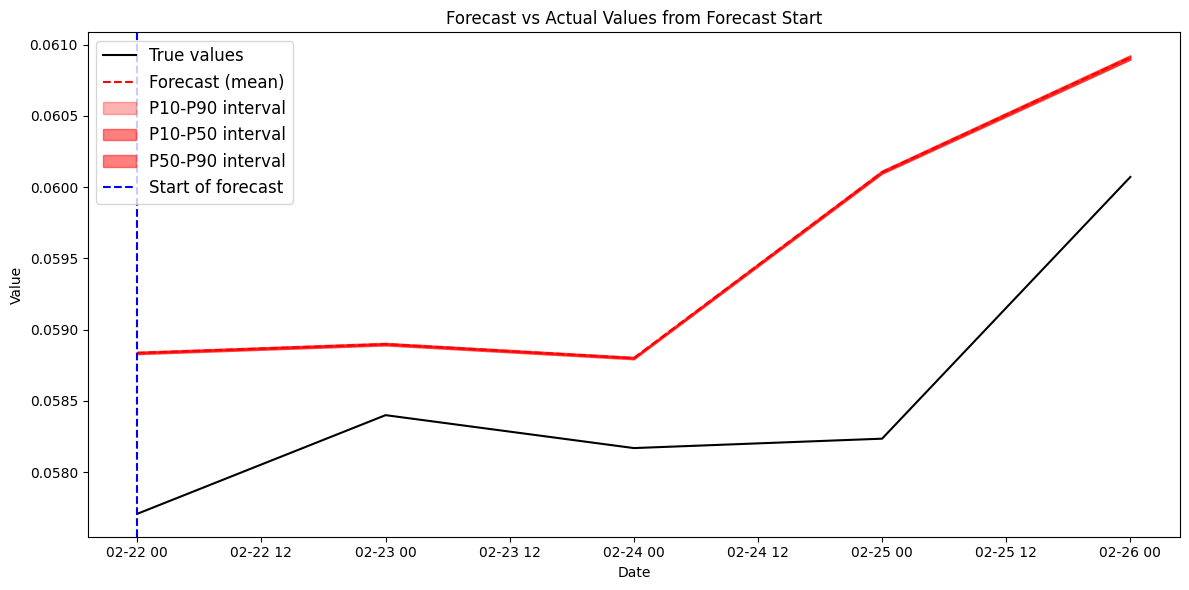

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data, and it's sorted by the index (date)
target_column = 'ETH-BTC_High'  # Ensure this matches your actual target column name
# Assuming the DataFrame's index is a datetime index and sorted
end_training = df.index[-prediction_length]  # Assuming prediction_length is defined earlier

# Ensure forecast_start_date is a datetime object and exists in df.index
forecast_start_date = end_training 

# Plot the forecast and actual values starting from the forecast start date
plt.figure(figsize=(12, 6))

# Plot actual values from the start of the forecast
actuals_start_index = df.index.get_loc(forecast_start_date)
plt.plot(df.index[actuals_start_index:], df[target_column][actuals_start_index:], label="True values", color="black")

# Assuming mean_predictions, p10_predictions, p50_predictions, p90_predictions are defined from the forecasting model
# Plot forecast values
forecast_index = pd.date_range(start=forecast_start_date, periods=prediction_length, freq=freq)  # freq should be defined as per your data's frequency
plt.plot(forecast_index, mean_predictions, color='red', linestyle='--', label="Forecast (mean)")
plt.fill_between(forecast_index, p10_predictions, p90_predictions, color='red', alpha=0.3, label="P10-P90 interval")
plt.fill_between(forecast_index, p10_predictions, p50_predictions, color='red', alpha=0.5, label="P10-P50 interval")
plt.fill_between(forecast_index, p50_predictions, p90_predictions, color='red', alpha=0.5, label="P50-P90 interval")

# Add a vertical line and other plot elements
plt.axvline(x=forecast_start_date, color='blue', linestyle='--', label='Start of forecast')
plt.legend(loc="upper left", fontsize="large")
plt.title('Forecast vs Actual Values from Forecast Start')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [7]:
last_row = df.iloc[-prediction_length:, :]
last_row

,ETH-BTC_High,ETH-BTC_Low,ETH-CAD_High,ETH-CAD_Low,BTC-CAD_High,BTC-CAD_Low,Global_Liquidity_Index,btc_AdrBalNtv0.01Cnt,btc_AdrBalNtv0.1Cnt,btc_AdrBalNtv1Cnt,...,eth_CapRealUSD,eth_FeeByteMeanNtv,eth_FlowInExNtv,eth_FlowOutExNtv,eth_FlowTfrFromExCnt,eth_NDF,eth_SplyAct1d,eth_SplyActPct1yr,eth_TxCnt,eth_VelCur1yr
2024-02-22,0.057708,0.056463,4080.433105,3889.075195,70823.007812,68408.390625,149267.862256,12514606.0,4557892.0,1018084.0,...,177970045703.737518,0.000005,338244.178803,369824.650815,115266.0,0.680495,12715855.813516,35.492136,1082822.0,6.038789
2024-02-23,0.058400,0.056821,4086.931885,3920.955078,70136.312500,68749.429688,148970.534800,12502806.0,4557570.0,1018299.0,...,177548830056.101593,0.000004,252603.100873,277404.199378,123997.0,0.680803,11815753.076549,35.465276,1159988.0,6.035038
2024-02-24,0.058169,0.057328,4035.814941,3928.526855,69447.539062,68190.140625,145602.136981,12500030.0,4558351.0,1018191.0,...,178232114484.84201,0.000002,155983.333289,186391.16255,108806.0,0.680875,11198452.093627,35.44651,1101339.0,6.028215
2024-02-25,0.058235,0.057437,4050.259277,3921.470459,69703.890625,68222.062500,145897.798533,12490326.0,4557653.0,1018266.0,...,179512181502.223663,0.000002,227567.047768,215196.061444,105301.0,0.681513,10462790.19109,35.402746,1102202.0,6.025079
2024-02-26,0.060071,0.057951,4208.451172,4024.901611,70131.234375,69194.062500,149631.566801,12500995.0,4562917.0,1017891.0,...,181001520683.269318,0.000004,396160.919196,385839.833249,119630.0,0.681429,12008606.912186,35.529806,1187460.0,6.035505


In [8]:
p50_predictions

array([0.05883661, 0.05889828, 0.0588005 , 0.06010452, 0.06090929],
      dtype=float32)

In [9]:
# Function to calculate sMAPE
def calculate_smape(forecasts, actuals):
    return 100 * np.mean(2 * np.abs(forecasts - actuals) / (np.abs(actuals) + np.abs(forecasts)))

# Calculate standard evaluation metrics for mean predictions
mae = np.mean(np.abs(mean_predictions - actuals))
rmse = np.sqrt(np.mean(np.square(mean_predictions - actuals)))
mape = np.mean(np.abs((mean_predictions - actuals) / actuals)) * 100
smape = calculate_smape(mean_predictions, actuals)

# Calculate the percentage of actuals within the 10th to 90th percentile range
within_range = np.sum((actuals >= p10_predictions) & (actuals <= p90_predictions)) / len(actuals) * 100

print("Evaluation Metrics for Mean Predictions:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")
print(f"Percentage of Actuals within P10-P90 Interval: {within_range:.2f}%")


Evaluation Metrics for Mean Predictions:
MAE: 0.00
RMSE: 0.00
MAPE: 1.70%
sMAPE: 1.68%
Percentage of Actuals within P10-P90 Interval: 0.00%


In [10]:
import os
import torch

# Define a path to save the model
model_save_path = 'dobby_high.pth'

# Assuming 'predictor' is the trained model from DeepAREstimator
torch.save(predictor, model_save_path)

print(f'Model saved to {model_save_path}')


Model saved to dobby_high.pth
